# Winter 2021 Data Science Intern Challenge

# Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \\$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

**a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

# *Evaluation of Raw Data*

Before we can determine what is wrong with the calculation of AOV, we should conduct a review of the raw data. This will allow us to identify any apparent issues and allow us to plan out a course of action.

In [1]:
#import raw data
from project_lib import Project
project = Project(project_id='8b557d30-5623-4cce-855a-fb688b9b82e0', project_access_token='p-ea4c6d007f3ca55b9ab29359453f1732be273ab8')
pc = project.project_context

datafile = project.get_file("Winter Data Science Intern Challenge Data Set.csv")

#import functions we will use for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#create a dataframe that will hold the rawdata
aov_df = pd.read_csv(datafile)

### What data is available?
Using the *head()* method will allow us to take a peak at the raw data and see what information is available...


In [2]:
aov_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


After reviewing the data, it looks like AOV was calculated using information within the column **order_amount**.

### How was AOV initially calculated?

Using *describe()* method we can get a summary of the base statistics of **order_amount**.

In [3]:
aov_df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We see that *AOV* equals the *mean* of the **order_amount** is \\$3145.13. 

As well, it looks like prices can be very polar, the *standard deviation* = \\$41282.54 and the *max* order amount = \\$704000.00. 

This may mean we have some values that could be considered outliers within the dataset.

### Visualizing the Data

Using a scatterplot and boxplot, we can visualize the data and confirm whether there are outliers present within the data...

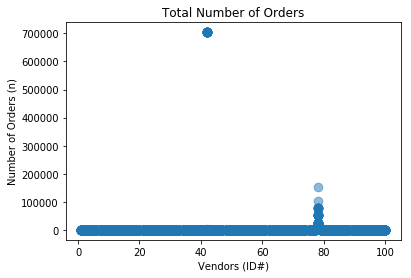

In [31]:
x = aov_df[['shop_id']]
y = aov_df[['order_amount']]

plt.scatter(x,y, s=75, alpha = .5)
plt.xlabel('Vendors (ID#)')
plt.ylabel('Number of Orders (n)')
plt.title('Total Number of Orders')
plt.show()

The scatterplot above and the boxplot below show that there is at least one outlier at around \\$700,000 and few more that seemed to be clustered between \\$200,000 and \\$0. The range of the datapoints is very large, this makes it difficult to discern how many outliers are present. In addition, it looks like the outliers are a result of two vendors, one around position 40 and the other just left of position 80. 

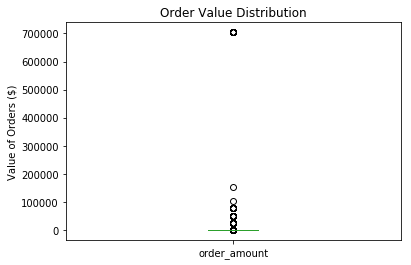

In [30]:
aov_df.boxplot(column = 'order_amount', grid = 0)

plt.ylabel('Value of Orders ($)')
plt.title('Order Value Distribution')
plt.show()

### Primary Analysis

After reviewing the raw data, it is apparent that there are outliers present within the dataset. 

We must perform further analysis in the form of a Z-Score and a Interquartile Range Tests to identify the specific outliers and then take steps to minimize their effect on our measures.

# *Identifying Outliers using a Z-Score Test*

This will help us identify values that are very distant from the mean. Typicaly a value with a normalized z-score below -3 or above +3 (standard deviations) is considered an outlier. 

In [6]:
orderamounts = aov_df['order_amount']
z_scores = np.abs(stats.zscore(orderamounts)) #This makes values all positive, allowing us to quickly identify values with less code
o_aov_df = aov_df[(z_scores > 3)] #because absolute values were used, we only need to identify z-scores above 3
o_aov_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


Reviewing the data above, we have identified 18 orders that could be considered outliers. As well, 17 out of 18 orders are for the same amount (\\$704,000) and from the same vendor (shop 42), this aligns with what we saw during the initial analysis above. 

### Removing the Outliers and Reviewing the Data

In [7]:
zadjusted_df = aov_df[(z_scores <= 3)] #Creates a new dataframe without the outliers identified above
zadjusted_df.order_amount.describe()

count      4982.000000
mean        723.261742
std        4848.500488
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      102900.000000
Name: order_amount, dtype: float64

We created a new dataframe without the 18 outliers identifed above and have listed a summary of the base statistics. 

The AOV is now a more reasonable \\$723.26 with the standard deviation reduced to \\$4848.50 and the max order amount reduced to \\$102900.00. 

Although these values seem more reasonable compared to our initial numbers, the range is still very large with the spread between the 75th (\\$390.00 )and 100th percentile (\\$102900.00) being \\$102510.00. 

### Visualizing the Data

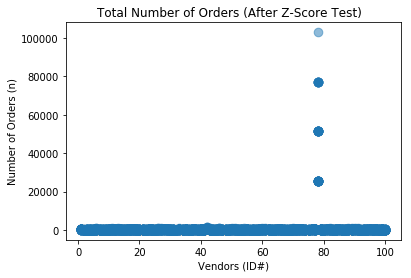

In [32]:
xplot = zadjusted_df[['shop_id']]
yplot = zadjusted_df[['order_amount']]

plt.scatter(xplot,yplot, s=75, alpha = .5)
plt.xlabel('Vendors (ID#)')
plt.ylabel('Number of Orders (n)')
plt.title('Total Number of Orders (After Z-Score Test)  ')
plt.show()

The scatterplot above and the boxplot below show that there are outliers present at \\$100000, \\$80000, \\$60000 and \\$20000. Again the range of the datapoints is still very large, making it difficult to discern how many outliers are present. It also looks like we removed the orders from the vendor at position 40, but the other at position 80 is still present. 

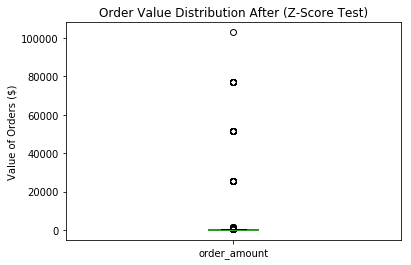

In [29]:
zadjusted_df.boxplot(column='order_amount', grid = 0)
plt.ylabel('Value of Orders ($)')
plt.title('Order Value Distribution After (Z-Score Test)')
plt.show()

### Secondary Analysis

After reviewing the data manipulated using z-scores, it is apparent that there are still outliers present within the dataset. 

We must perform further analysis to identify the specific outliers and continue to take steps to minimize their effect on our measures.

# *Identifying Outliers using a Interquartile Range Test*

This will help us identify values that are very distant from the median. Typicaly a value that is -1.5 or above +1.5 (IQR deviations) is considered an outlier. 

In [10]:
q1 = aov_df.order_amount.quantile(q=0.25)
q2 = aov_df.order_amount.quantile(q=0.5)
q3 = aov_df.order_amount.quantile(q=0.75)
IQR = q3 - q1

IQRadjusted_df = aov_df[(aov_df.order_amount < (q2 + IQR * 1.5)) & (aov_df.order_amount > (q2 - IQR * 1.5))]
IQRadjusted_df.order_amount.describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

We created a new dataframe removing 262 outliers that did not fall within our confidence interval established above (+/-1.5 IQR deviations from the median). 

The AOV (mean) is now a more reaslistic \\$283.26 with the standard deviation reduced to \\$132.06 and the max order amount reduced to \\$624.00.

All of these values are reasonable when compared to our initial numbers, we should graph the new dataset to see if this conclusion holds true visually. 

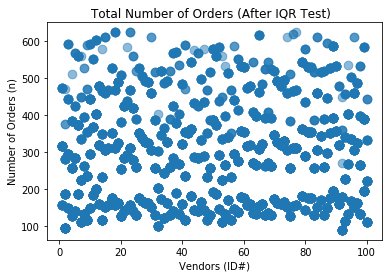

In [33]:
xplot = IQRadjusted_df[['shop_id']]
yplot = IQRadjusted_df[['order_amount']]

plt.scatter(xplot,yplot, s=75, alpha = .5)
plt.xlabel('Vendors (ID#)')
plt.ylabel('Number of Orders (n)')
plt.title('Total Number of Orders (After IQR Test)  ')
plt.show()

The scatterplot above and the boxplot below show show no discernable outliers present within the data. This confirms that we have removed the outliers from the dataset allowing us to be confident in the summary of results above. 

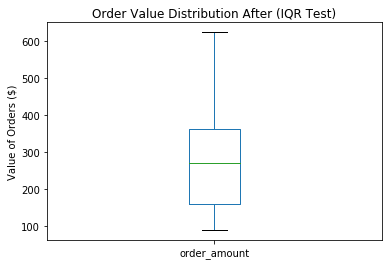

In [28]:
IQRadjusted_df.boxplot(column='order_amount', grid = 0)
plt.ylabel('Value of Orders ($)')
plt.title('Order Value Distribution After (IQR Test)')
plt.show()

# Conclusion (Answer to Question 1a)

After completing our initial analysis, it was clear that using the mean of the order_amounts was not effective. The original Average Order Value was \\$3145.13, this number was being exagerated due to the presence of outliers within the original data. These values were produced by a small group of vendors (n=262) either selling large quantities or selling items at very high price points when compared to the majority of vendors (n=4738). 

Using the Interquartile range allowed us to remove the outliers that were affecting the data. 
Measures that rely on the mean like the z-score can be skewed if there are outliers that are very large/polar.
The IQR test does not use the mean and as a result proved to be the most efffective way to evaluate the dataset.

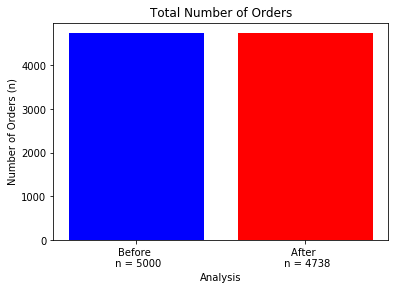

In [35]:
y1 = aov_df['shop_id'].count() #5000
y2 = IQRadjusted_df['shop_id'].count() #4738
x1 = ['Before \n n = 5000']
x2 = ['After \n n = 4738']

plt.bar(x1,y2, label='before', color='b')
plt.bar(x2,y2, label='after', color='r')
plt.xlabel('Analysis')
plt.ylabel('Number of Orders (n)')
plt.title('Total Number of Orders')
plt.show()


# Question 1 - Continued

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

**b. What metric would you report for this dataset?**

Throughout this analysis, the **median** reamained consistent despite changes made to the population: 

**\\$284.00** - After Inital Measure 

**\\$284.00** - After Z-Score 

**\\$272.00** - After IQR 

In contrast, the **mean** varied widely depending on the conditions applied to the population:

**\\$3145.13** - After Initial Measure

**\\$723.26** - After Z-Score

**\\$283.81** - After IQR



Ultimately, the decision of which metric depends on it's intended use. If one were to use this dataset as a way to create a KPI that measures whether a vendor is performing well or performing poorly compared to all other vendors, I believe using the median as a threshold value would be ideal as it would cut the dataset perfectly in half. Vendors who complete orders above the median-threshold on a consistent basis would be high performers and those shops below would be consider underperformers. 


On the other hand, if we were trying to measure the performance of a single vendor or a group of vendors over time, AOV would be better used. As this would tell us if a vendor or market segment was increasing or decreasing in performance when comparing two time intervals.   


**Keeping all of this in mind, I feel that we should continue to use AOV (mean of order_amounts)**, as it seems that we were trying to take a measure of the overall shoe market. However, extra care should be taken to ensure that the data is clean and outliers are assessed prior to measuring a mean moving forward.

**c. What is its value?**

The adjusted value of Average Order Volume (AOV) is $283.81

# Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

**a. How many orders were shipped by Speedy Express in total?**

```
SELECT COUNT(*) AS SpeedyExpressCount
FROM [Shippers]
    JOIN [Orders]
        ON [Shippers].ShipperID = [Orders].ShipperID
WHERE [Shippers].ShipperName = 'Speedy Express'
```

_**In total, 54 orders were shipped by Speedy Express**_

**b. What is the last name of the employee with the most orders?**

```
SELECT [Employees].LastName, COUNT(*) AS EmployeeOrders
FROM [Employees]
    JOIN [Orders]
        ON [Employees].EmployeeID = [Orders].EmployeeID
GROUP BY [Employees].LastName
ORDER BY EmployeeOrders DESC
LIMIT 1
```

_**The last name of the employee with the most orders (40) is Peacock**_

**c. What product was ordered the most by customers in Germany?**

```
SELECT [Products].ProductName,
    SUM([OrderDetails].Quantity) AS "TotalOrders", [Customers].Country
FROM [Orders]
	JOIN [OrderDetails]
		ON [Orders].OrderID = [OrderDetails].OrderID
	JOIN [Products]
    	ON [OrderDetails].ProductID = [Products].ProductID
	JOIN [Customers]
    	ON [Customers].CustomerID = [Orders].CustomerID
WHERE [Customers].Country = 'Germany'
GROUP BY [OrderDetails].ProductID
ORDER BY TotalOrders DESC 
LIMIT 1
```

_**Boston Crab Meat was the product most ordered by (160) customers in Germany**_